# Unsupervised Learning: Clustering

In classification (supervised), we try to find boundaries/rules to separate points according to pre-determined labels.

In clustering, the algorithm chooses the labels.  Goal is to choose labels so that similar rows get labeled the same.

Today: K-Means Clustering

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import datasets

In [13]:
x, y = datasets.make_blobs(n_samples=100, centers=3, cluster_std=1.2, random_state=3)
df = pd.DataFrame(x, columns=["x0", "x1"])
df.head()

,x0,x1
0,8.370099,7.747045
1,-2.701740,0.395336
2,-3.204128,-0.407438
3,-3.132762,-1.335692
4,7.152737,6.069995


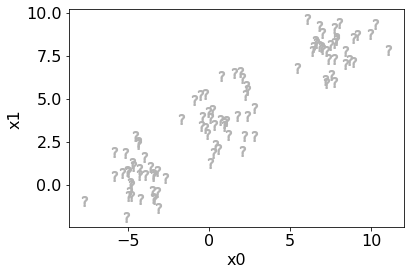

In [14]:
# x0 => x-axis
# x1 => y-axis
# cluster => marker type
def km_scatter(df, **kwargs):
    ax = kwargs.pop("ax", None)
    if not "label" in df.columns:
        return df.plot.scatter(x="x0", y="x1", marker="$?$", ax=ax, **kwargs)

    for marker in set(df["label"]):
        sub_df = df[df["label"] == marker]
        ax = sub_df.plot.scatter(x="x0", y="x1", marker=marker, ax=ax, **kwargs)
    return ax

ax = km_scatter(df, s=100, c="0.7")

# Hard Problem

Finding the best answer.

# Easier Problem

Taking a bad answer and make it a little better.  Then repeat!

<AxesSubplot:xlabel='x0', ylabel='x1'>

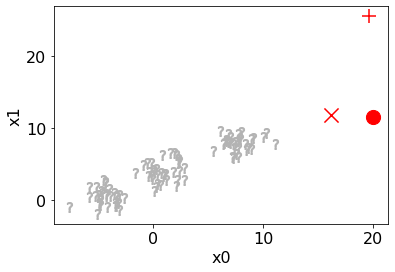

In [56]:
clusters = np.random.uniform(-5, 30, size=(3,2))
clusters = pd.DataFrame(clusters, columns=["x0", "x1"])
clusters["label"] = ["o", "+", "x"]

ax = km_scatter(df, s=100, c="0.7")
km_scatter(clusters, s=200, c="red", ax=ax)

In [5]:
clusters

,x0,x1,label
0,-3.190228,4.458255,o
1,0.577851,4.356592,+
2,1.677318,-3.638316,x


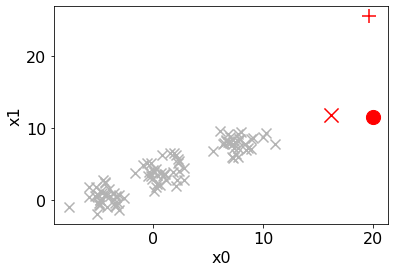

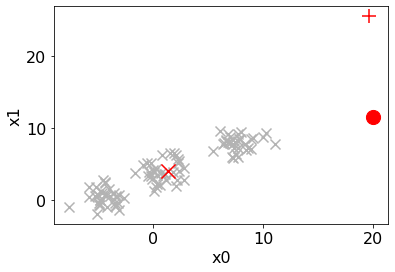

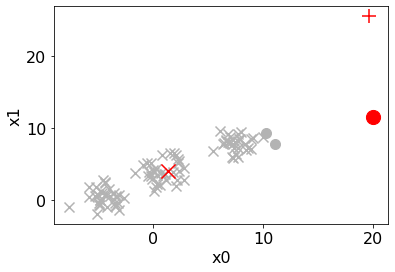

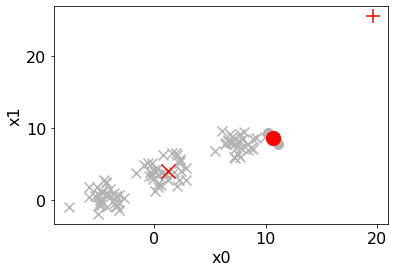

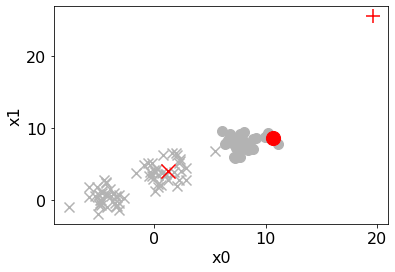

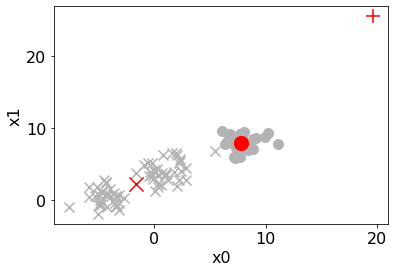

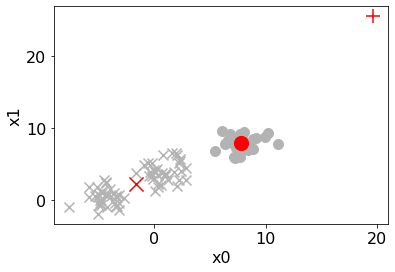

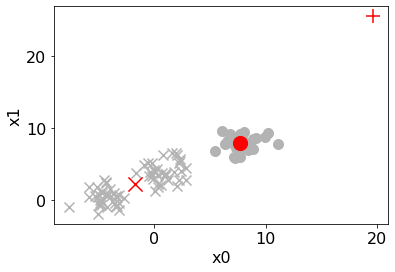

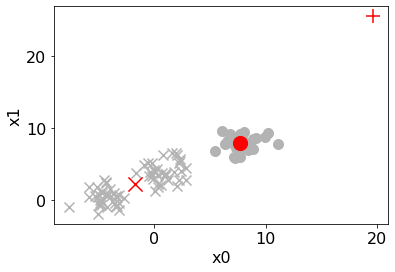

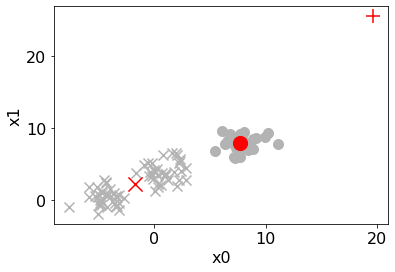

In [57]:
class KM:
    def __init__(self, df, clusters):
        self.df = df.copy()
        self.clusters = clusters.copy()
        self.labels = np.array(clusters["label"])
        
    def plot(self):
        ax = km_scatter(self.df, s=100, c="0.7")
        km_scatter(self.clusters, s=200, c="red", ax=ax)
    
    # put each point in the closest cluster
    # clusters => update df of points
    def assign_points(self):
        for cluster in self.clusters.itertuples():
            x0_diff = self.df["x0"] - cluster.x0
            x1_diff = self.df["x1"] - cluster.x1
            dist = (x0_diff**2 + x1_diff**2) ** 0.5
            self.df[cluster.label] = dist
        self.df["label"] = self.labels[self.df[self.labels].values.argmin(axis=1)]
    
    # move cluster locations to be the average of points they contain
    # df of points => update clusters
    def update_centers(self):
        for cluster in self.clusters.itertuples():
            cluster_points_df = self.df[self.df["label"] == cluster.label]
            if len(cluster_points_df) == 0:
                continue
            
            x0_mean = cluster_points_df["x0"].mean()
            x1_mean = cluster_points_df["x1"].mean()
            
            self.clusters.at[cluster.Index, "x0"] = x0_mean
            self.clusters.at[cluster.Index, "x1"] = x1_mean

km = KM(df, clusters)

# fit centroids to the data

# "epoch" is the name for the "i" variable in iteratives algorithms like this
for epoch in range(5):
    km.assign_points()
    km.plot()
    km.update_centers()
    km.plot()
    # measure how well the points fit: break out of loop if minimal improvement

In [24]:
df

,x0,x1
0,8.370099,7.747045
1,-2.701740,0.395336
2,-3.204128,-0.407438
3,-3.132762,-1.335692
4,7.152737,6.069995
...,...,...
95,-4.681343,1.086141
96,-3.410109,0.515456
97,0.683092,3.737246
98,7.744654,7.293236


# KMeans in sklearn

In [58]:
# km: our custom code
# km2: the sklearn version

In [60]:
# 1. fit: learn the centroids
km2 = KMeans(3)
km2.fit(df[["x0", "x1"]])
km2.cluster_centers_

array([[-4.41347291,  0.43410278],
       [ 7.69751168,  7.9241129 ],
       [ 0.85985598,  3.98556415]])

In [62]:
km.clusters

,x0,x1,label
0,7.697512,7.924113,o
1,19.648553,25.495340,+
2,-1.737455,2.236337,x


In [64]:
# 2. transform: give distances to centroids
km2.transform(df[["x0", "x1"]])   [:10, :]

array([[14.72748598,  0.69550479,  8.39955315],
       [ 1.71217188, 12.83849367,  5.057144  ],
       [ 1.47333179, 13.72080475,  5.984516  ],
       [ 2.18458064, 14.24916908,  6.65257594],
       [12.86625407,  1.93249405,  6.62911793],
       [ 1.56004975, 14.14472291,  6.42867089],
       [ 1.29983259, 14.79157898,  7.00663718],
       [13.35025948,  1.56332001,  7.09747529],
       [ 1.20010768, 13.93648735,  6.1620119 ],
       [ 5.12923462,  9.23940355,  1.75079801]])

In [71]:
km2.fit_transform(df[["x0", "x1"]])   [:10, :]
# shortcut:
#km2.fit(df[["x0", "x1"]])
#km2.transform(df[["x0", "x1"]])

array([[14.72748598,  0.69550479,  8.39955315],
       [ 1.71217188, 12.83849367,  5.057144  ],
       [ 1.47333179, 13.72080475,  5.984516  ],
       [ 2.18458064, 14.24916908,  6.65257594],
       [12.86625407,  1.93249405,  6.62911793],
       [ 1.56004975, 14.14472291,  6.42867089],
       [ 1.29983259, 14.79157898,  7.00663718],
       [13.35025948,  1.56332001,  7.09747529],
       [ 1.20010768, 13.93648735,  6.1620119 ],
       [ 5.12923462,  9.23940355,  1.75079801]])

In [66]:
km.df[["o", "+", "x"]].head()

,o,+,x
0,0.695505,21.028683,11.512192
1,12.838494,33.608716,2.078252
2,13.720805,34.542712,3.023355
3,14.249169,35.197906,3.834876
4,1.932494,23.097391,9.681552


In [8]:
# 3. predict (strange name): gives the assigned categories/clusters of each row

In [69]:
km2.predict(df[["x0", "x1"]])

array([1, 0, 0, 0, 1, 0, 0, 1, 0, 2, 0, 1, 1, 1, 2, 0, 1, 1, 0, 0, 2, 2,
       0, 2, 0, 1, 1, 2, 0, 1, 2, 2, 1, 0, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2,
       0, 0, 2, 0, 1, 0, 2, 1, 0, 1, 0, 1, 0, 1, 2, 2, 2, 0, 2, 2, 0, 2,
       1, 0, 2, 0, 0, 1, 2, 0, 2, 2, 0, 2, 1, 0, 2, 2, 2, 2, 1, 2, 0, 1,
       2, 1, 2, 1, 1, 0, 1, 0, 0, 2, 1, 1], dtype=int32)

In [68]:
km.df["label"].head()

0    o
1    x
2    x
3    x
4    o
Name: label, dtype: object

In [72]:
km2.fit_predict(df[["x0", "x1"]])

array([2, 1, 1, 1, 2, 1, 1, 2, 1, 0, 1, 2, 2, 2, 0, 1, 2, 2, 1, 1, 0, 0,
       1, 0, 1, 2, 2, 0, 1, 2, 0, 0, 2, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0,
       1, 1, 0, 1, 2, 1, 0, 2, 1, 2, 1, 2, 1, 2, 0, 0, 0, 1, 0, 0, 1, 0,
       2, 1, 0, 1, 1, 2, 0, 1, 0, 0, 1, 0, 2, 1, 0, 0, 0, 0, 2, 0, 1, 2,
       0, 2, 0, 2, 2, 1, 2, 1, 1, 0, 2, 2], dtype=int32)

# How many clusters?

In [85]:
# inertia is the average squared distance from a point to it's centroid

line_df = pd.Series(dtype=float) # index=x values, values=y values

for cluster_count in range(1, 10):
    km = KMeans(cluster_count)
    km.fit(df[["x0", "x1"]])
    line_df.loc[cluster_count] = km.inertia_
    
line_df

1    3621.095890
2     927.007644
3     260.719685
4     212.800619
5     180.483456
6     155.612650
7     132.819314
8     110.828494
9      93.434330
dtype: float64

Text(0, 0.5, 'Inertia (Avg Sq Dist to Centroid)')

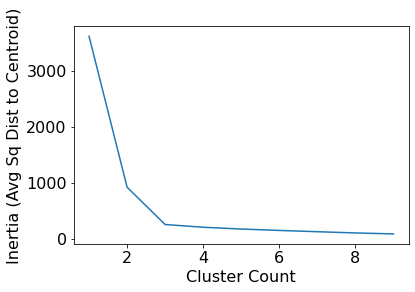

In [88]:
# note elbow at clusters=3
ax = line_df.plot.line()
ax.set_xlabel("Cluster Count")
ax.set_ylabel("Inertia (Avg Sq Dist to Centroid)")

Text(0, 0.5, 'Inertia (Avg Sq Dist to Centroid)')

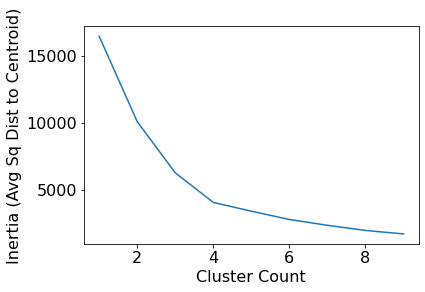

In [90]:
df_rand = pd.DataFrame(np.random.uniform(0, 10, (1000, 2)))

# same plot as before, for random data
line_df = pd.Series(dtype=float) # index=x values, values=y values

for cluster_count in range(1, 10):
    km = KMeans(cluster_count)
    km.fit(df_rand)
    line_df.loc[cluster_count] = km.inertia_
    
ax = line_df.plot.line()
ax.set_xlabel("Cluster Count")
ax.set_ylabel("Inertia (Avg Sq Dist to Centroid)")

# KMeans as Preprocessing

Sometimes we'll use an unsupervised learning technique (like k-means) to pre-process data, creating better inputs for a supervised learning technique (like logistic regression)

In [9]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [10]:
def make_data():
    x, y = datasets.make_blobs(n_samples=250, centers=5, random_state=5)
    xcols = ["x0", "x1"]
    df1 = pd.DataFrame(x, columns=xcols)
    df1["y"] = y > 0

    df2 = pd.DataFrame(np.random.uniform(-10, 10, size=(250, 2)), columns=["x0", "x1"])
    df2["y"] = False

    return pd.concat((df1, df2))

train, test = train_test_split(make_data())

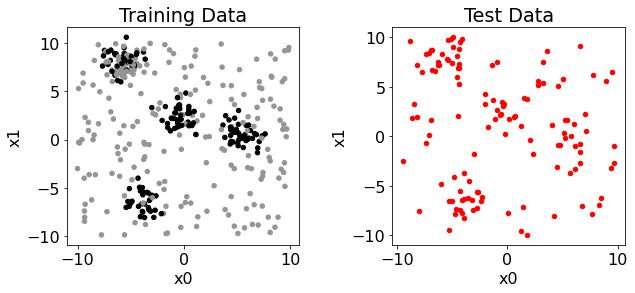

In [11]:
plt.rcParams["font.size"] = 16
fig, ax = plt.subplots(ncols=2, figsize=(10,4))
train.plot.scatter(x="x0", y="x1", c=train["y"], vmin=-1, ax=ax[0])
test.plot.scatter(x="x0", y="x1", c="red", ax=ax[1])
ax[0].set_title("Training Data")
ax[1].set_title("Test Data")
plt.subplots_adjust(wspace=0.4)

# StandardScaler with KMeans

<AxesSubplot:xlabel='0', ylabel='1'>

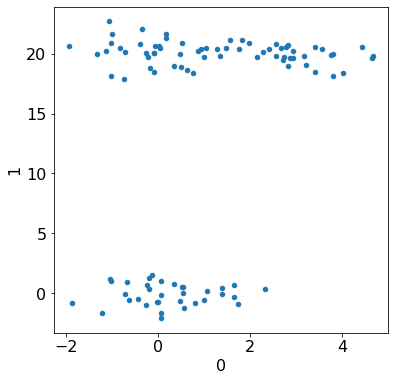

In [12]:
x = datasets.make_blobs(centers=np.array([(0,0), (0,20), (3,20)]))[0]
df = pd.DataFrame(x)
df.plot.scatter(x=0, y=1, figsize=(6,6))